In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


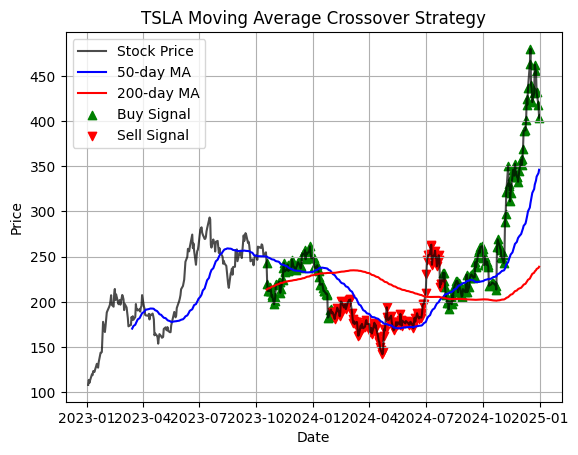

In [3]:
ticker = "TSLA"
data = yf.download(ticker, start="2023-01-01", end="2025-01-01")
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

data['Signal'] = 0
data.loc[data['50_MA'] > data['200_MA'], 'Signal'] = 1
data.loc[data['50_MA'] < data['200_MA'], 'Signal'] = -1

plt.figure()
plt.plot(data.index, data['Close'], label='Stock Price', color='black', alpha=0.7)
plt.plot(data.index, data['50_MA'], label='50-day MA', color='blue')
plt.plot(data.index, data['200_MA'], label='200-day MA', color='red')

plt.scatter(data.index[data['Signal'] == 1], data['Close'][data['Signal'] == 1], 
            label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index[data['Signal'] == -1], data['Close'][data['Signal'] == -1], 
            label='Sell Signal', marker='v', color='red', alpha=1)

plt.title(f"{ticker} Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
